<a href="https://colab.research.google.com/github/kohlisaurabhsagar/miscellaenous/blob/main/credit_risk_model_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Dataset Used: https://www.kaggle.com/c/GiveMeSomeCredit***


**Credit Risk Model Development**

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'cs_training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'cs_test.csv').drop(['Unnamed: 0'],axis=1)

**Data Exploration and Understanding:**

In [3]:
train.shape

(150000, 11)

In [4]:
test.shape

(101503, 11)

In [5]:
train_redup = train.drop_duplicates()

In [6]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [7]:
train_redup.shape

(149391, 11)

In [8]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [9]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [10]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [11]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [12]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-12-eeda2eaba563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
<ipython-input-12-eeda2eaba563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [13]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [14]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [15]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [16]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

<ipython-input-16-55bbbc7c8038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [17]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [18]:
filled_train = fam_nmiss.append(fam_miss)

<ipython-input-18-f1952169a1e3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_train = fam_nmiss.append(fam_miss)


In [19]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [20]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [21]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [22]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [23]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [24]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [25]:
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

<Axes: >

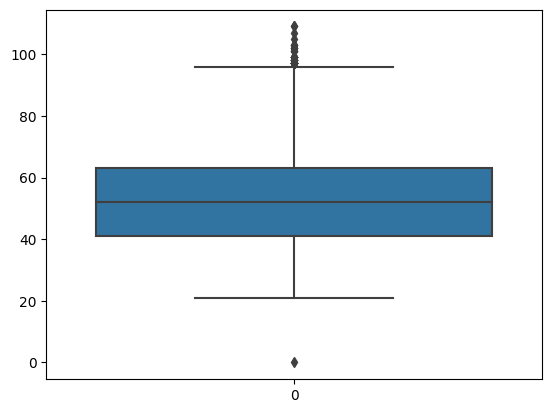

In [26]:
sns.boxplot(util_droped['age'])

In [27]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [28]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [29]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [30]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [31]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

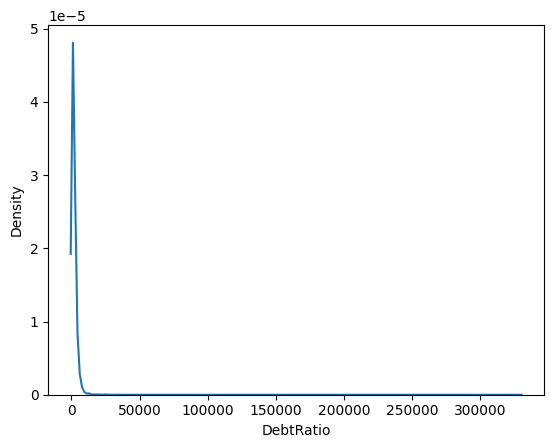

In [32]:
sns.kdeplot(util_droped['DebtRatio'])

In [33]:
util_droped['DebtRatio'].quantile([.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In [34]:
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


**Data Preprocessing:**

In [35]:
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [40]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

**Model Selection and Training:**

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
model = XGBClassifier(tree_method = 'exact')

In [43]:
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [44]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

**Model Evaluation:**

In [45]:
accuracy_score(y,y_pred)

0.9465207571520757

In [46]:
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

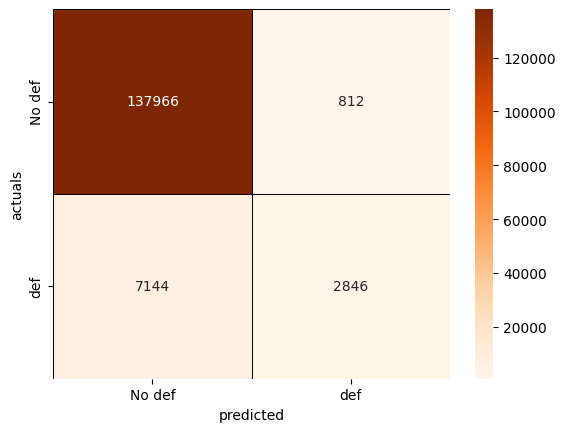

In [47]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [48]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.78      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.86      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768

